In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 
warnings.filterwarnings('ignore')

In [31]:
data = pd.read_csv('Weather data.csv')

In [32]:
data.head()

,Date/Time,Temp_C,Dew Point Temp_C,Rel Hum_%,Wind Speed_km/h,Visibility_km,Press_kPa,Weather
0,1/1/2012 0:00,-1.8,-3.9,86,4,8.0,101.24,Fog
1,1/1/2012 1:00,-1.8,-3.7,87,4,8.0,101.24,Fog
2,1/1/2012 2:00,-1.8,-3.4,89,7,4.0,101.26,"Freezing Drizzle,Fog"
3,1/1/2012 3:00,-1.5,-3.2,88,6,4.0,101.27,"Freezing Drizzle,Fog"
4,1/1/2012 4:00,-1.5,-3.3,88,7,4.8,101.23,Fog


In [33]:
data.shape

(8784, 8)

In [34]:
data.isnull().sum()

Date/Time           0
Temp_C              0
Dew Point Temp_C    0
Rel Hum_%           0
Wind Speed_km/h     0
Visibility_km       0
Press_kPa           0
Weather             0
dtype: int64

In [35]:
data.describe()

,Temp_C,Dew Point Temp_C,Rel Hum_%,Wind Speed_km/h,Visibility_km,Press_kPa
count,8784.000000,8784.000000,8784.000000,8784.000000,8784.000000,8784.000000
mean,8.798144,2.555294,67.431694,14.945469,27.664447,101.051623
std,11.687883,10.883072,16.918881,8.688696,12.622688,0.844005
min,-23.300000,-28.500000,18.000000,0.000000,0.200000,97.520000
25%,0.100000,-5.900000,56.000000,9.000000,24.100000,100.560000
50%,9.300000,3.300000,68.000000,13.000000,25.000000,101.070000
75%,18.800000,11.800000,81.000000,20.000000,25.000000,101.590000
max,33.000000,24.400000,100.000000,83.000000,48.300000,103.650000


In [36]:
data.head()

,Date/Time,Temp_C,Dew Point Temp_C,Rel Hum_%,Wind Speed_km/h,Visibility_km,Press_kPa,Weather
0,1/1/2012 0:00,-1.8,-3.9,86,4,8.0,101.24,Fog
1,1/1/2012 1:00,-1.8,-3.7,87,4,8.0,101.24,Fog
2,1/1/2012 2:00,-1.8,-3.4,89,7,4.0,101.26,"Freezing Drizzle,Fog"
3,1/1/2012 3:00,-1.5,-3.2,88,6,4.0,101.27,"Freezing Drizzle,Fog"
4,1/1/2012 4:00,-1.5,-3.3,88,7,4.8,101.23,Fog


In [37]:
data['Date/Time'].value_counts()

1/1/2012 0:00       1
9/1/2012 3:00       1
8/31/2012 21:00     1
8/31/2012 22:00     1
8/31/2012 23:00     1
                   ..
5/1/2012 17:00      1
5/1/2012 16:00      1
5/1/2012 15:00      1
5/1/2012 14:00      1
12/31/2012 23:00    1
Name: Date/Time, Length: 8784, dtype: int64

In [38]:
data['Day'] = data['Date/Time'].apply(lambda x:str(x).split('/')[1])
data['Month'] = data['Date/Time'].apply(lambda x:str(x).split('/')[0])
data['Year'] = data['Date/Time'].apply(lambda x:str(x).split('/')[2])
data['Time'] = data['Year'].apply(lambda x:str(x).split(' ')[1])
data['Year'] = data['Year'].apply(lambda x:str(x).split(' ')[0])

In [39]:
data.head()

,Date/Time,Temp_C,Dew Point Temp_C,Rel Hum_%,Wind Speed_km/h,Visibility_km,Press_kPa,Weather,Day,Month,Year,Time
0,1/1/2012 0:00,-1.8,-3.9,86,4,8.0,101.24,Fog,1,1,2012,0:00
1,1/1/2012 1:00,-1.8,-3.7,87,4,8.0,101.24,Fog,1,1,2012,1:00
2,1/1/2012 2:00,-1.8,-3.4,89,7,4.0,101.26,"Freezing Drizzle,Fog",1,1,2012,2:00
3,1/1/2012 3:00,-1.5,-3.2,88,6,4.0,101.27,"Freezing Drizzle,Fog",1,1,2012,3:00
4,1/1/2012 4:00,-1.5,-3.3,88,7,4.8,101.23,Fog,1,1,2012,4:00


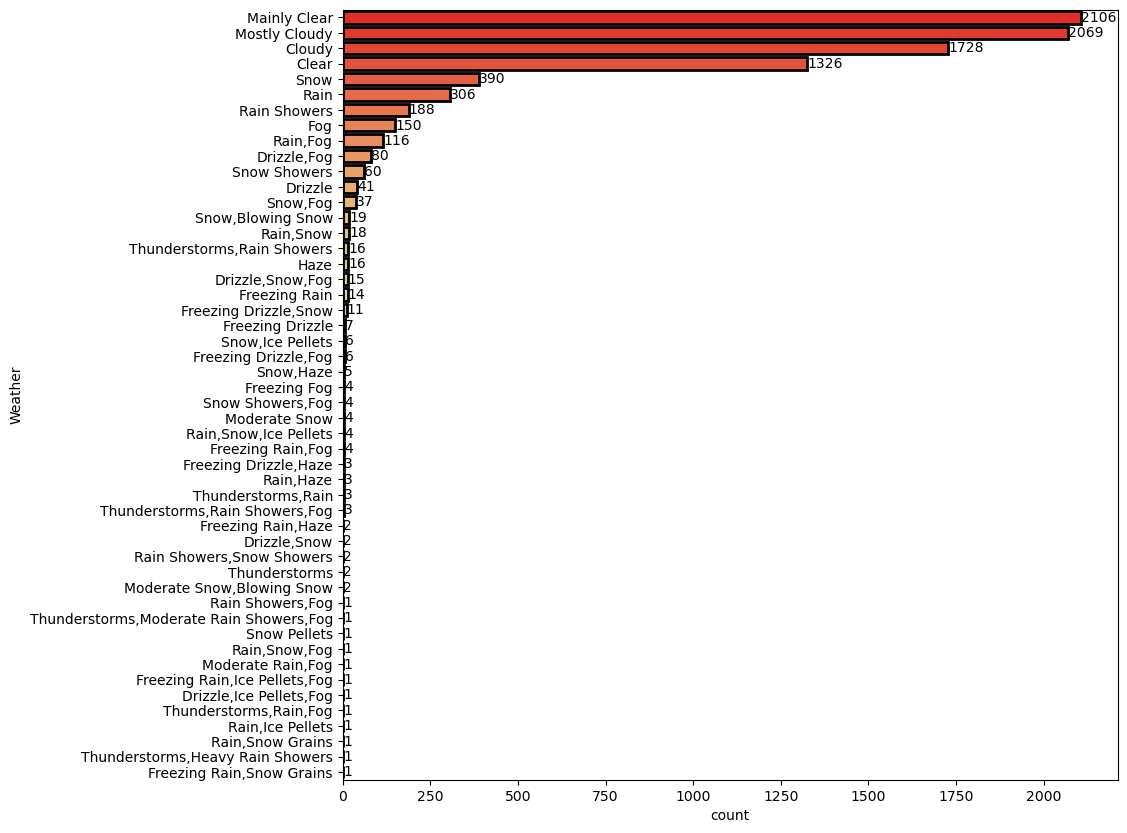

In [81]:
fig,ax = plt.subplots(figsize=(10,10))
sns.countplot(data=data,y='Weather',ax=ax,order=data['Weather'].value_counts(ascending=False).index,ec='k',lw=2,palette='rainbow_r')
ax.bar_label(ax.containers[0])
plt.show()

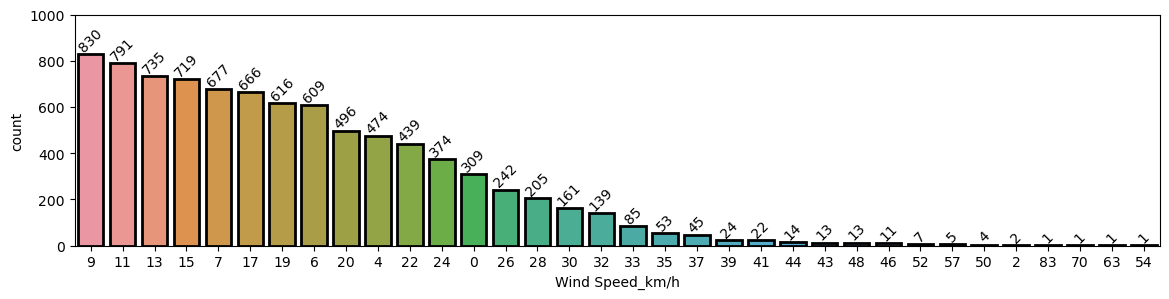

In [77]:
fig,ax = plt.subplots(figsize=(14,3))
sns.countplot(data=data,x='Wind Speed_km/h',ax=ax,order=data['Wind Speed_km/h'].value_counts(ascending=False).index,ec='k',lw=2)
ax.bar_label(ax.containers[0],rotation=45)
plt.ylim(0,1000)
plt.show()

In [66]:
# How many times weather was clear
data[data['Weather']=='Clear'].shape[0]

1326

In [67]:
# Find the number of times when the 'Wind Speed was exactly 4 km/h'.
data[data['Wind Speed_km/h']==4].shape[0]

474

In [68]:
# What is the Standard Deviation of 'Pressure'  in this data?
data['Press_kPa'].std()

0.8440047459486474

In [69]:
# What is the Variance of 'Relative Humidity' in this data ?
data['Rel Hum_%'].var()

286.2485501984998

Snow was recorded 583 times.


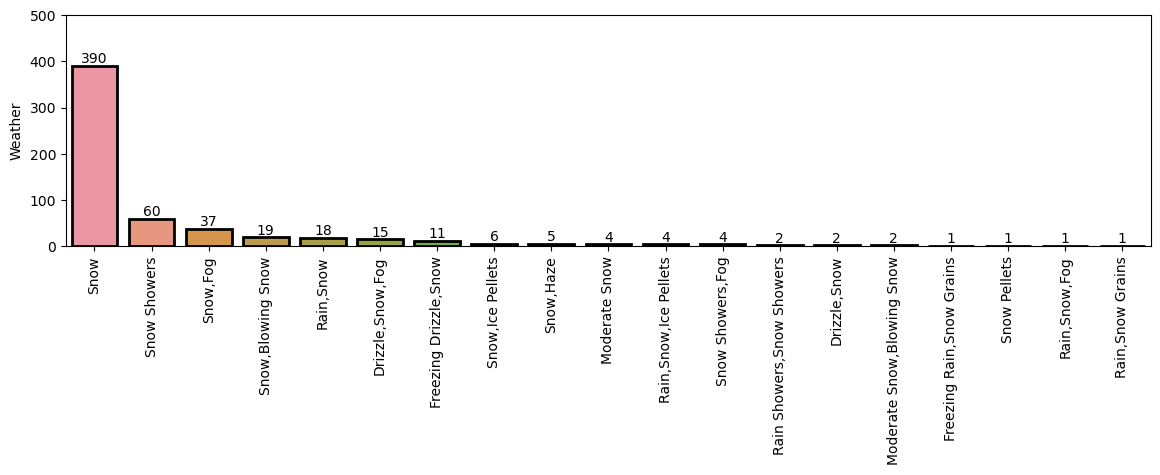

In [94]:
# Find all instances when 'Snow' was recorded.
print('Snow was recorded',data[data['Weather'].str.contains('snow',case=False)].shape[0],'times.')
x = data[data['Weather'].str.contains('snow',case=False)]['Weather'].value_counts().keys()
y = data[data['Weather'].str.contains('snow',case=False)]['Weather'].value_counts()
fig,ax = plt.subplots(figsize=(14,3))
sns.barplot(x,y,ax=ax,ec='k',lw=2)
ax.bar_label(ax.containers[0])
plt.xticks(rotation=90)
plt.ylim(0,500)
plt.show()

In [102]:
# Find all instances when 'Wind Speed is above 24' and 'Visibility is 25'.
data[((data['Wind Speed_km/h']>24) & (data['Visibility_km']==25))]

,Date/Time,Temp_C,Dew Point Temp_C,Rel Hum_%,Wind Speed_km/h,Visibility_km,Press_kPa,Weather,Day,Month,Year,Time
23,1/1/2012 23:00,5.3,2.0,79,30,25.0,99.31,Cloudy,1,1,2012,23:00
24,1/2/2012 0:00,5.2,1.5,77,35,25.0,99.26,Rain Showers,2,1,2012,0:00
25,1/2/2012 1:00,4.6,0.0,72,39,25.0,99.26,Cloudy,2,1,2012,1:00
26,1/2/2012 2:00,3.9,-0.9,71,32,25.0,99.26,Mostly Cloudy,2,1,2012,2:00
27,1/2/2012 3:00,3.7,-1.5,69,33,25.0,99.30,Mostly Cloudy,2,1,2012,3:00
...,...,...,...,...,...,...,...,...,...,...,...,...
8705,12/28/2012 17:00,-8.6,-12.0,76,26,25.0,101.34,Mainly Clear,28,12,2012,17:00
8753,12/30/2012 17:00,-12.1,-15.8,74,28,25.0,101.26,Mainly Clear,30,12,2012,17:00
8755,12/30/2012 19:00,-13.4,-16.5,77,26,25.0,101.47,Mainly Clear,30,12,2012,19:00
8759,12/30/2012 23:00,-12.1,-15.1,78,28,25.0,101.52,Mostly Cloudy,30,12,2012,23:00


**There are total 308 instance when Wind Speed is above 24 and Visibility is 25**

In [103]:
# What is the Mean value of each column against each 'Weather Condition ?
data.groupby('Weather').mean()

,Temp_C,Dew Point Temp_C,Rel Hum_%,Wind Speed_km/h,Visibility_km,Press_kPa
Weather,,,,,,
Clear,6.825716,0.089367,64.497738,10.557315,30.153243,101.587443
Cloudy,7.970544,2.375810,69.592593,16.127315,26.625752,100.911441
Drizzle,7.353659,5.504878,88.243902,16.097561,17.931707,100.435366
"Drizzle,Fog",8.067500,7.033750,93.275000,11.862500,5.257500,100.786625
"Drizzle,Ice Pellets,Fog",0.400000,-0.700000,92.000000,20.000000,4.000000,100.790000
"Drizzle,Snow",1.050000,0.150000,93.500000,14.000000,10.500000,100.890000
"Drizzle,Snow,Fog",0.693333,0.120000,95.866667,15.533333,5.513333,99.281333
Fog,4.303333,3.159333,92.286667,7.946667,6.248000,101.184067
Freezing Drizzle,-5.657143,-8.000000,83.571429,16.571429,9.200000,100.202857


In [104]:
# What is the Minimum & Maximum value of each column against each 'Weather Condition ?
data.groupby('Weather').min()

,Date/Time,Temp_C,Dew Point Temp_C,Rel Hum_%,Wind Speed_km/h,Visibility_km,Press_kPa,Day,Month,Year,Time
Weather,,,,,,,,,,,
Clear,1/11/2012 1:00,-23.3,-28.5,20,0,11.3,99.52,1,1,2012,0:00
Cloudy,1/1/2012 17:00,-21.4,-26.8,18,0,11.3,98.39,1,1,2012,0:00
Drizzle,1/23/2012 21:00,1.1,-0.2,74,0,6.4,97.84,1,1,2012,10:00
"Drizzle,Fog",1/23/2012 20:00,0.0,-1.6,85,0,1.0,98.65,1,1,2012,0:00
"Drizzle,Ice Pellets,Fog",12/17/2012 9:00,0.4,-0.7,92,20,4.0,100.79,17,12,2012,9:00
"Drizzle,Snow",12/17/2012 15:00,0.9,0.1,92,9,9.7,100.63,17,12,2012,15:00
"Drizzle,Snow,Fog",12/18/2012 21:00,0.3,-0.1,92,7,2.4,97.79,18,12,2012,0:00
Fog,1/1/2012 0:00,-16.0,-17.2,80,0,0.2,98.31,1,1,2012,0:00
Freezing Drizzle,1/13/2012 10:00,-9.0,-12.2,78,6,4.8,98.44,1,1,2012,0:00


In [105]:
data.groupby('Weather').max()

,Date/Time,Temp_C,Dew Point Temp_C,Rel Hum_%,Wind Speed_km/h,Visibility_km,Press_kPa,Day,Month,Year,Time
Weather,,,,,,,,,,,
Clear,9/9/2012 5:00,32.8,20.4,99,33,48.3,103.63,9,9,2012,9:00
Cloudy,9/9/2012 23:00,30.5,22.6,99,54,48.3,103.65,9,9,2012,9:00
Drizzle,9/30/2012 3:00,18.8,17.7,96,30,25.0,101.56,4,9,2012,7:00
"Drizzle,Fog",9/30/2012 2:00,19.9,19.1,100,28,9.7,102.07,9,9,2012,9:00
"Drizzle,Ice Pellets,Fog",12/17/2012 9:00,0.4,-0.7,92,20,4.0,100.79,17,12,2012,9:00
"Drizzle,Snow",12/19/2012 18:00,1.2,0.2,95,19,11.3,101.15,19,12,2012,18:00
"Drizzle,Snow,Fog",12/22/2012 3:00,1.1,0.6,98,32,9.7,100.15,22,12,2012,7:00
Fog,9/22/2012 0:00,20.8,19.6,100,22,9.7,103.04,9,9,2012,9:00
Freezing Drizzle,2/1/2012 5:00,-2.3,-3.3,93,26,12.9,101.02,7,2,2012,5:00


In [106]:
# Show all the Records where Weather Condition is Fog.
data[data['Weather']=='Fog']

,Date/Time,Temp_C,Dew Point Temp_C,Rel Hum_%,Wind Speed_km/h,Visibility_km,Press_kPa,Weather,Day,Month,Year,Time
0,1/1/2012 0:00,-1.8,-3.9,86,4,8.0,101.24,Fog,1,1,2012,0:00
1,1/1/2012 1:00,-1.8,-3.7,87,4,8.0,101.24,Fog,1,1,2012,1:00
4,1/1/2012 4:00,-1.5,-3.3,88,7,4.8,101.23,Fog,1,1,2012,4:00
5,1/1/2012 5:00,-1.4,-3.3,87,9,6.4,101.27,Fog,1,1,2012,5:00
6,1/1/2012 6:00,-1.5,-3.1,89,7,6.4,101.29,Fog,1,1,2012,6:00
...,...,...,...,...,...,...,...,...,...,...,...,...
8716,12/29/2012 4:00,-16.0,-17.2,90,6,9.7,101.25,Fog,29,12,2012,4:00
8717,12/29/2012 5:00,-14.8,-15.9,91,4,6.4,101.25,Fog,29,12,2012,5:00
8718,12/29/2012 6:00,-13.8,-15.3,88,4,9.7,101.25,Fog,29,12,2012,6:00
8719,12/29/2012 7:00,-14.8,-16.4,88,7,8.0,101.22,Fog,29,12,2012,7:00


In [107]:
# Find all instances when 'Weather is Clear' or 'Visibility is above 40'.
data[(data['Weather']=='Clear') | (data['Visibility_km']>40)]

,Date/Time,Temp_C,Dew Point Temp_C,Rel Hum_%,Wind Speed_km/h,Visibility_km,Press_kPa,Weather,Day,Month,Year,Time
67,1/3/2012 19:00,-16.9,-24.8,50,24,25.0,101.74,Clear,3,1,2012,19:00
106,1/5/2012 10:00,-6.0,-10.0,73,17,48.3,100.45,Mainly Clear,5,1,2012,10:00
107,1/5/2012 11:00,-5.6,-10.2,70,22,48.3,100.41,Mainly Clear,5,1,2012,11:00
108,1/5/2012 12:00,-4.7,-9.6,69,20,48.3,100.38,Mainly Clear,5,1,2012,12:00
109,1/5/2012 13:00,-4.4,-9.7,66,26,48.3,100.40,Mainly Clear,5,1,2012,13:00
...,...,...,...,...,...,...,...,...,...,...,...,...
8749,12/30/2012 13:00,-12.4,-16.2,73,37,48.3,100.92,Mostly Cloudy,30,12,2012,13:00
8750,12/30/2012 14:00,-11.8,-16.1,70,37,48.3,100.96,Mainly Clear,30,12,2012,14:00
8751,12/30/2012 15:00,-11.3,-15.6,70,32,48.3,101.05,Mainly Clear,30,12,2012,15:00
8752,12/30/2012 16:00,-11.4,-15.5,72,26,48.3,101.15,Mainly Clear,30,12,2012,16:00


In [111]:
"""Find all instances when :
A. 'Weather is Clear' and 'Relative Humidity is greater than 50'
or
B. 'Visibility is above 40'"""
data[((data['Weather']=='Clear') & (data['Rel Hum_%']>50) | (data['Visibility_km']>40))]

,Date/Time,Temp_C,Dew Point Temp_C,Rel Hum_%,Wind Speed_km/h,Visibility_km,Press_kPa,Weather,Day,Month,Year,Time
106,1/5/2012 10:00,-6.0,-10.0,73,17,48.3,100.45,Mainly Clear,5,1,2012,10:00
107,1/5/2012 11:00,-5.6,-10.2,70,22,48.3,100.41,Mainly Clear,5,1,2012,11:00
108,1/5/2012 12:00,-4.7,-9.6,69,20,48.3,100.38,Mainly Clear,5,1,2012,12:00
109,1/5/2012 13:00,-4.4,-9.7,66,26,48.3,100.40,Mainly Clear,5,1,2012,13:00
110,1/5/2012 14:00,-5.1,-10.7,65,22,48.3,100.46,Mainly Clear,5,1,2012,14:00
...,...,...,...,...,...,...,...,...,...,...,...,...
8749,12/30/2012 13:00,-12.4,-16.2,73,37,48.3,100.92,Mostly Cloudy,30,12,2012,13:00
8750,12/30/2012 14:00,-11.8,-16.1,70,37,48.3,100.96,Mainly Clear,30,12,2012,14:00
8751,12/30/2012 15:00,-11.3,-15.6,70,32,48.3,101.05,Mainly Clear,30,12,2012,15:00
8752,12/30/2012 16:00,-11.4,-15.5,72,26,48.3,101.15,Mainly Clear,30,12,2012,16:00


In [115]:
Month = list(data['Month'].unique())
Month_name = ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']
data['Month'] = data['Month'].replace(to_replace=Month,value=Month_name)

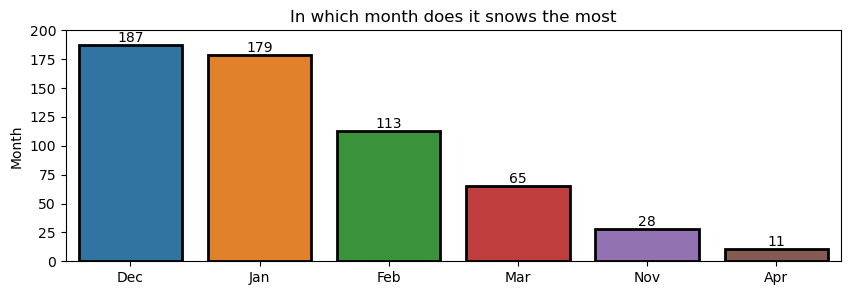

In [125]:
# in which month does it snows the most
y = data[data['Weather'].str.contains('snow',case=False)]['Month'].value_counts()
x = data[data['Weather'].str.contains('snow',case=False)]['Month'].value_counts().keys()
fig,ax = plt.subplots(figsize=(10,3))
sns.barplot(x,y,ax=ax,ec='k',lw=2)
ax.bar_label(ax.containers[0])
plt.title('In which month does it snows the most')
plt.ylim(0,200)
plt.show()

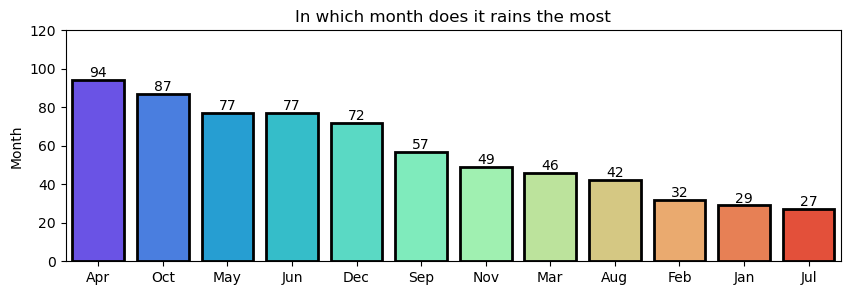

In [130]:
# in which month does it rains the most
y = data[data['Weather'].str.contains('rain',case=False)]['Month'].value_counts()
x = data[data['Weather'].str.contains('rain',case=False)]['Month'].value_counts().keys()
fig,ax = plt.subplots(figsize=(10,3))
sns.barplot(x,y,ax=ax,ec='k',lw=2,palette='rainbow')
ax.bar_label(ax.containers[0])
plt.title('In which month does it rains the most')
plt.ylim(0,120)
plt.show()

In [132]:
# in which month the temp is 0
data[data['Temp_C']==0]['Month'].unique()

array(['Jan', 'Feb', 'Mar', 'Oct', 'Nov', 'Dec'], dtype=object)

In [139]:
# what is the average temperature in the month of May at 10pm
data[((data['Month']=='May') & (data['Time']=='20:00'))]['Temp_C'].mean()

17.06774193548387